In [1]:
import import_ipynb
from enron_preprocess import (
    enron1_preprocess,
    enron2_preprocess,
    enron3_preprocess,
    enron4_preprocess,
    enron5_preprocess,
    enron6_preprocess,
    merged_enron_preprocess
)

[nltk_data] Downloading package punkt to E:/nltk...
[nltk_data]   Package punkt is already up-to-date!


Total number of words: 42620
Total number of words that appear less than 4 times
32213


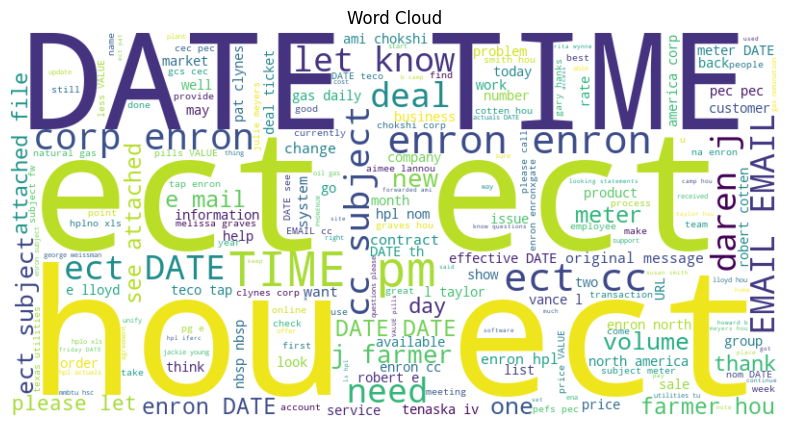

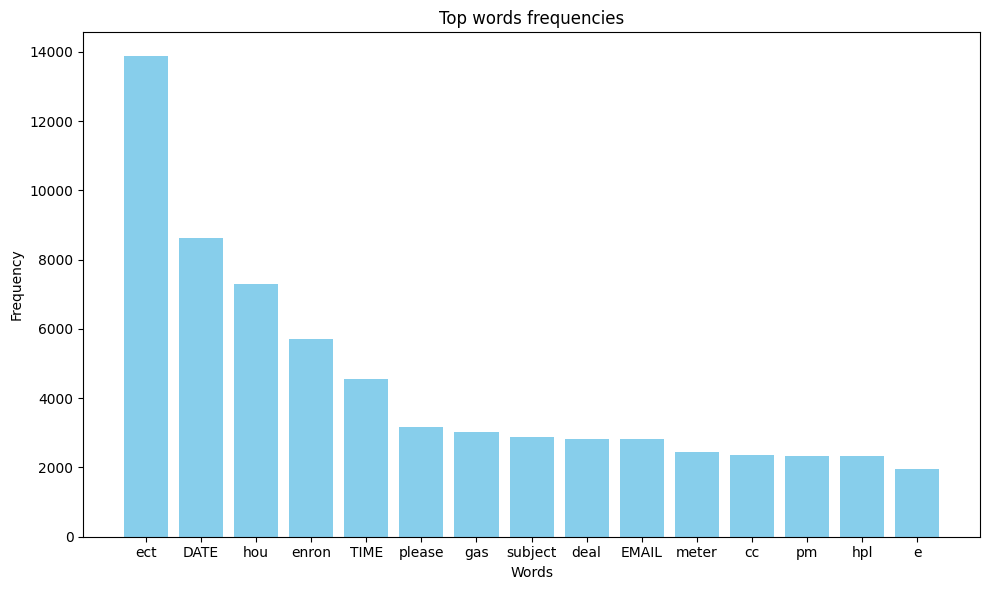

In [2]:
enron1_preprocess.visualize_wordcloud()
enron1_preprocess.visualize_bar_chart()

Total number of words: 34290
Total number of words that appear less than 4 times
21180


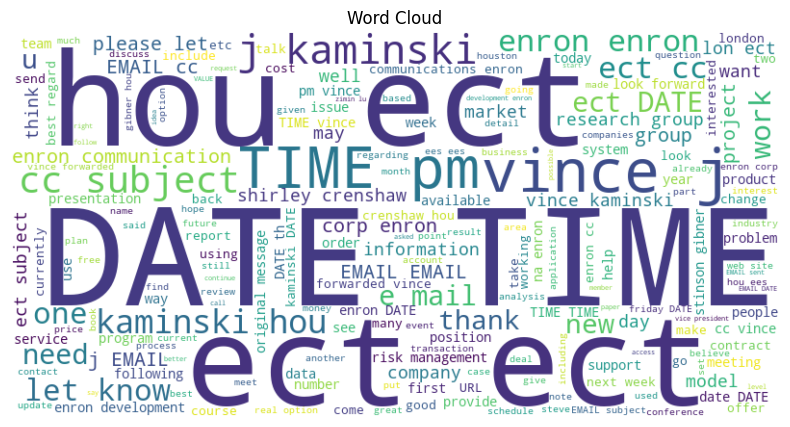

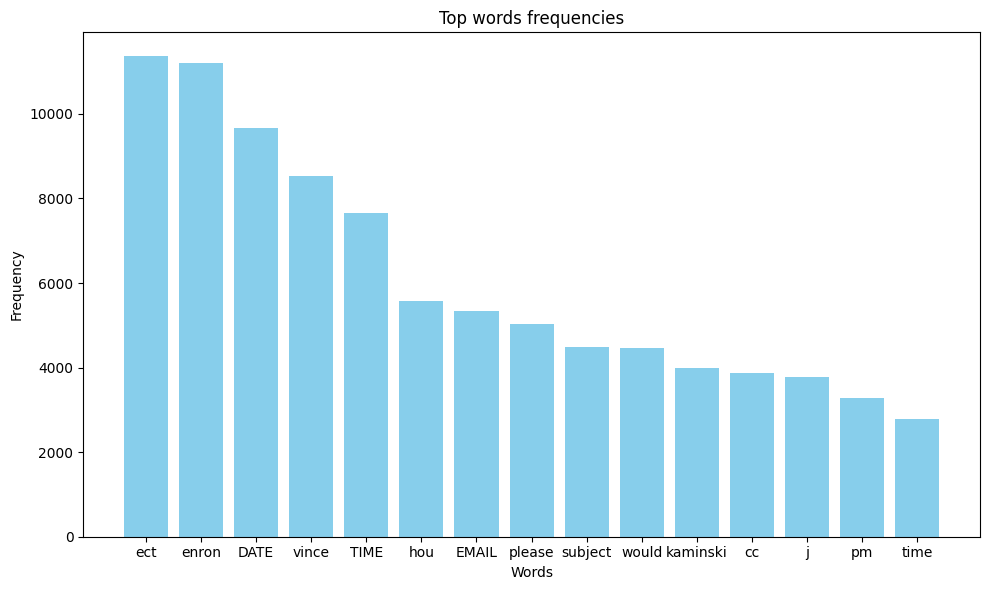

In [3]:
enron2_preprocess.visualize_wordcloud()
enron2_preprocess.visualize_bar_chart()

Total number of words: 48111
Total number of words that appear less than 4 times
30718


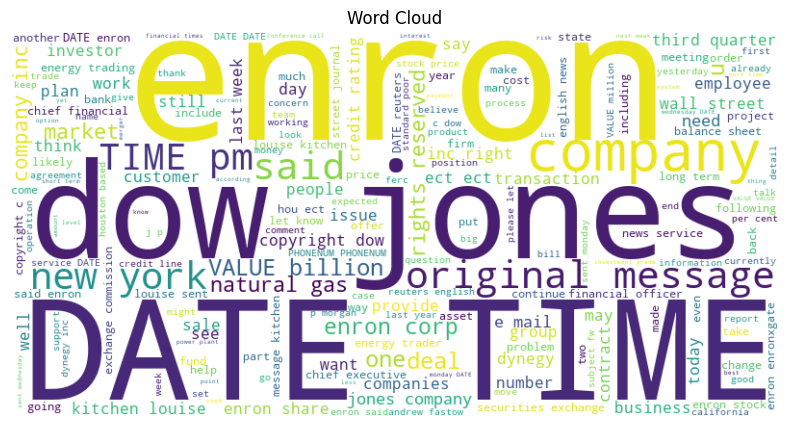

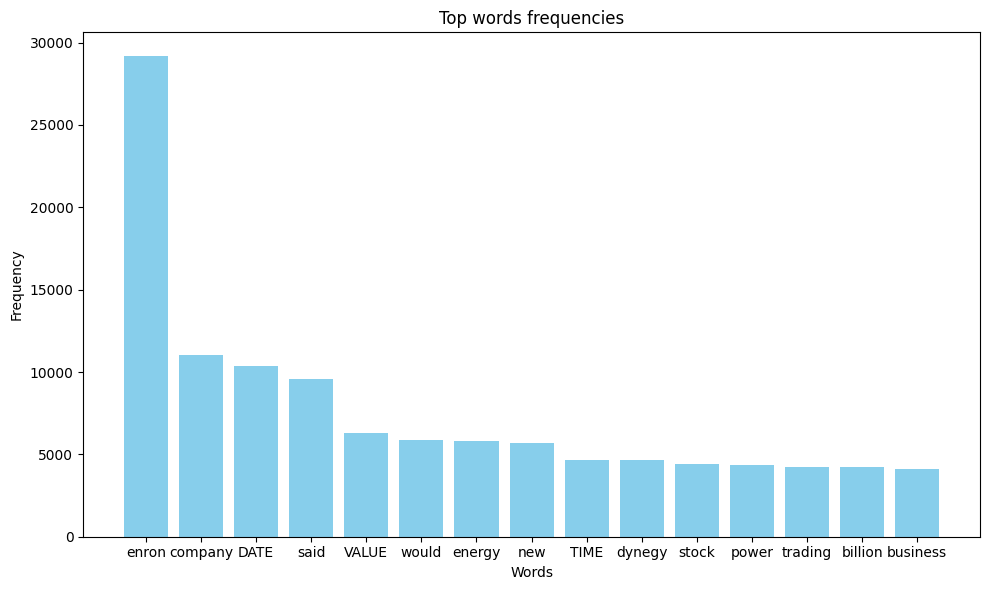

In [4]:
enron3_preprocess.visualize_wordcloud()
enron3_preprocess.visualize_bar_chart()

Total number of words: 61730
Total number of words that appear less than 4 times
42244


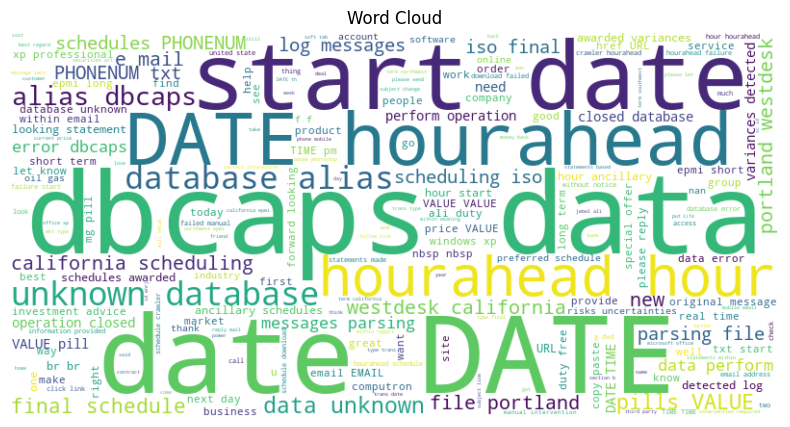

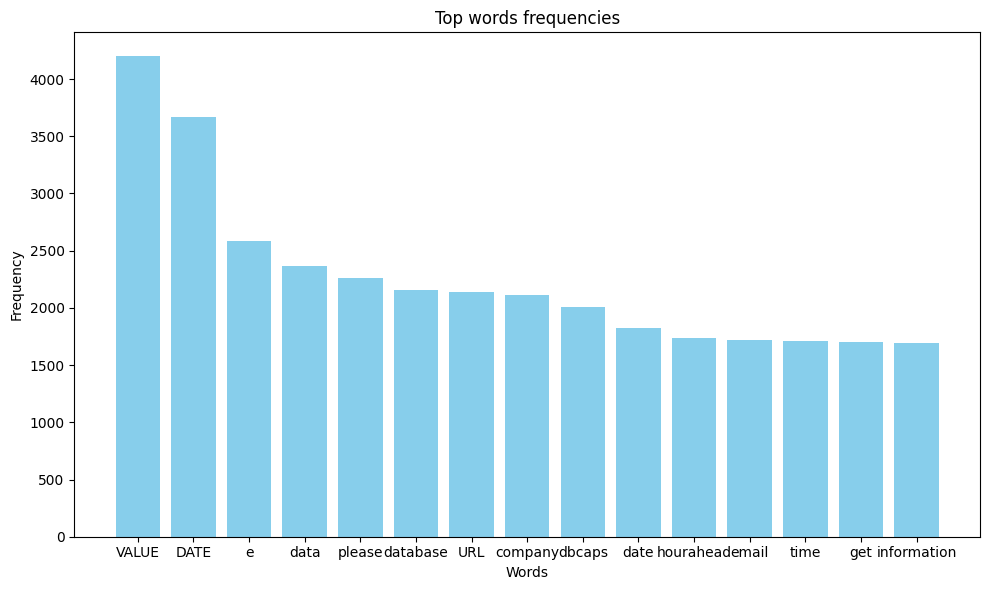

In [5]:
enron4_preprocess.visualize_wordcloud()
enron4_preprocess.visualize_bar_chart()

Total number of words: 36625
Total number of words that appear less than 4 times
24064


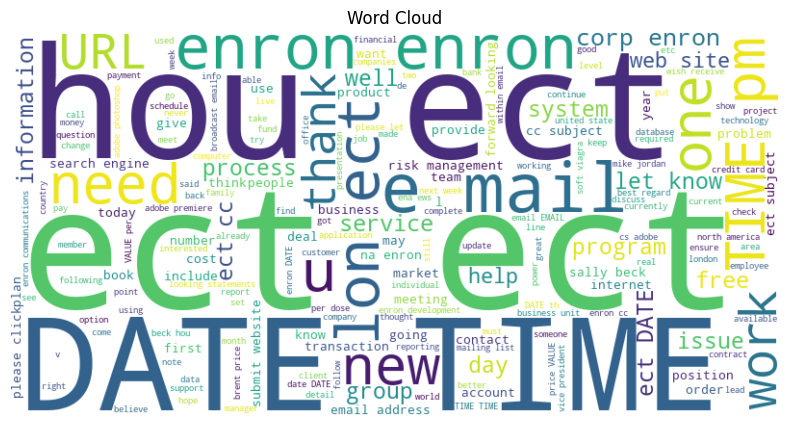

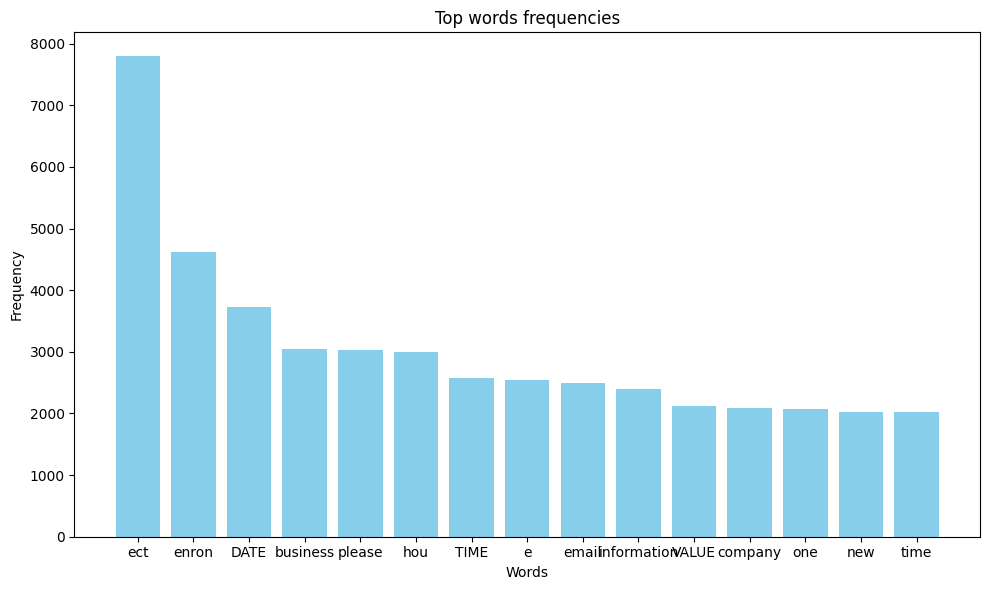

In [6]:
enron5_preprocess.visualize_wordcloud()
enron5_preprocess.visualize_bar_chart()

Total number of words: 63700
Total number of words that appear less than 4 times
46482


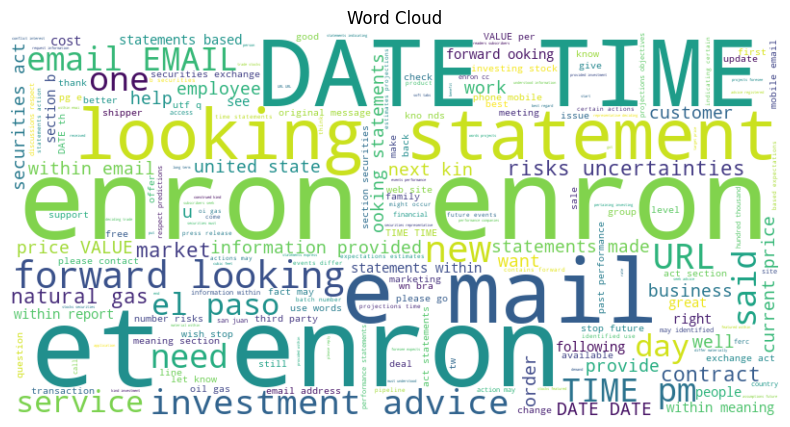

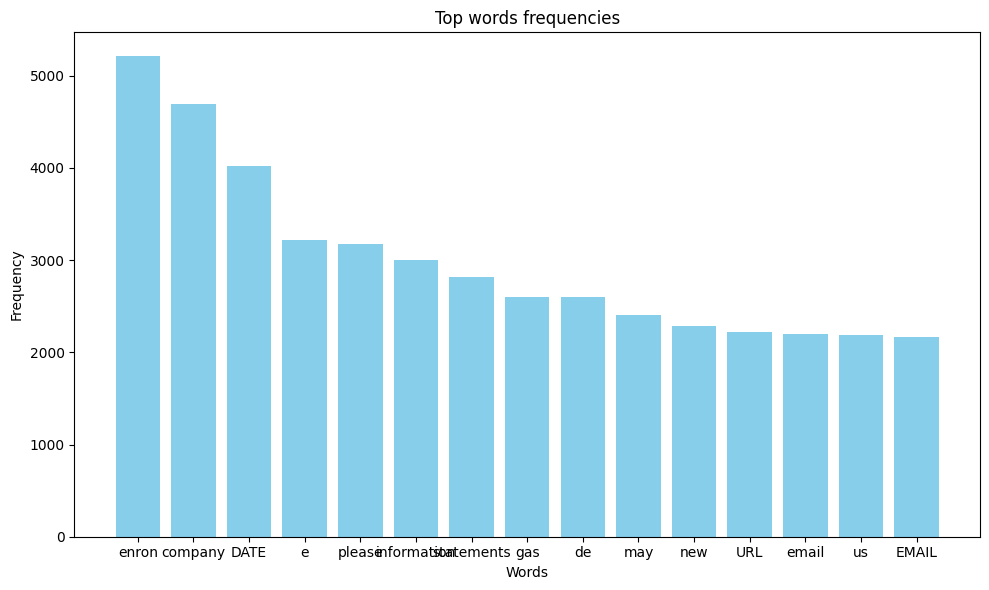

In [7]:
enron6_preprocess.visualize_wordcloud()
enron6_preprocess.visualize_bar_chart()

Total number of words: 134275
Total number of words that appear less than 4 times
84168


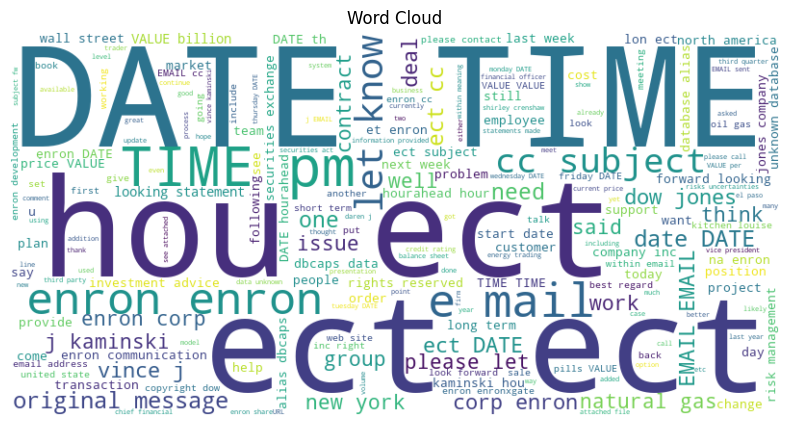

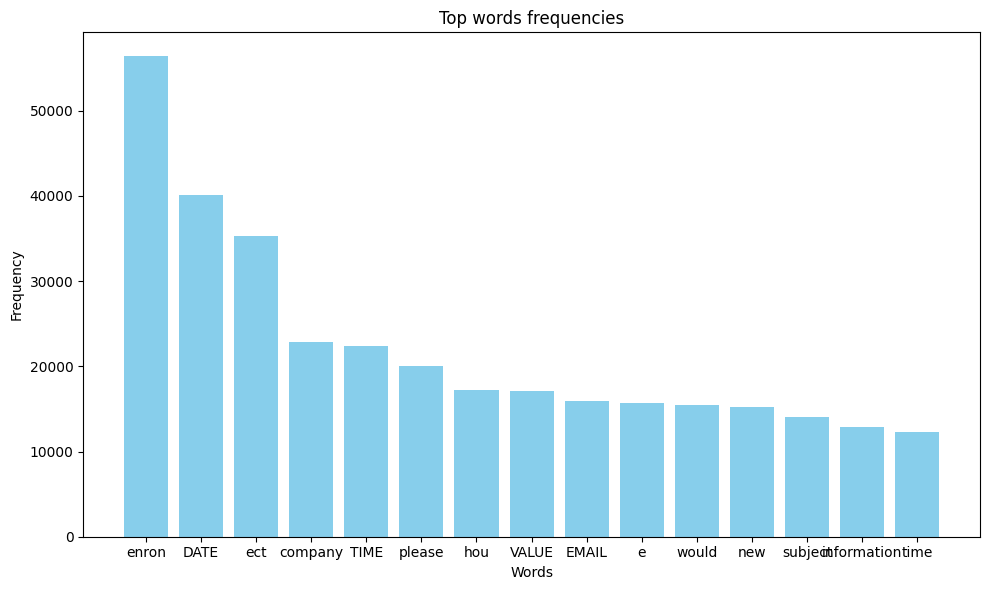

In [8]:
merged_enron_preprocess.visualize_wordcloud()
merged_enron_preprocess.visualize_bar_chart()